In [22]:
from PIL import Image, ImageDraw

import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt


def path_to_img_array(path):
    '''
    Load image into numpy array
    '''
    img = Image.open(path)
    vec = np.array(img)    
    return vec


def pick_colors(vec, numColors):
    '''
    Do k-means clustering over ``vec`` to return ``numColors``
    '''
    vec = vec.reshape(-1, 3)
    model = KMeans(n_clusters=numColors).fit(vec)
    return model.cluster_centers_


def show_key_colors(colorList):
    '''
    Make a long rectangle, composed of the colors
    detailed in colorList, a list of (R, G, B) tuples
    '''
    n = len(colorList)

    im = Image.new('RGBA', (100*n, 100))
    draw = ImageDraw.Draw(im)

    for idx, color in enumerate(colorList):
        color = tuple([int(x) for x in color])
        print(color)
        draw.rectangle([(100*idx, 0), (100*(idx+1), 100*(idx+1))],
                       fill=tuple(color))

    return im


def avg_rgb(picVec):
    fn = lambda arr, i: int(np.average(arr[:, :, i]))
    return fn(picVec, 0), fn(picVec, 1), fn(picVec, 2)

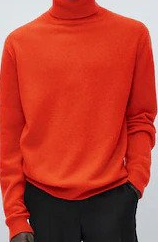

In [23]:
img = Image.open('static/crop/1.jpeg')
img

In [24]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [25]:
import numpy as np
vec = np.array(img)
vec

array([[[222, 225, 230],
        [222, 225, 230],
        [222, 225, 230],
        ...,
        [221, 224, 233],
        [221, 224, 233],
        [221, 224, 233]],

       [[222, 225, 230],
        [222, 225, 230],
        [222, 225, 230],
        ...,
        [221, 224, 231],
        [221, 224, 233],
        [221, 224, 233]],

       [[222, 225, 230],
        [222, 225, 230],
        [222, 225, 230],
        ...,
        [222, 225, 232],
        [222, 225, 232],
        [222, 225, 232]],

       ...,

       [[202, 206, 209],
        [206, 203, 212],
        [208, 202, 216],
        ...,
        [196, 199, 204],
        [196, 199, 204],
        [196, 199, 204]],

       [[201, 210, 207],
        [207, 206, 214],
        [208, 202, 216],
        ...,
        [197, 200, 205],
        [197, 200, 205],
        [197, 200, 205]],

       [[200, 209, 206],
        [206, 205, 213],
        [208, 202, 216],
        ...,
        [197, 200, 205],
        [197, 200, 205],
        [197, 200, 205]]

In [26]:
path = 'static/crop/1.jpeg'
vec = path_to_img_array(path)
vec.shape

(242, 158, 3)

In [27]:
img.size

(158, 242)

In [28]:
vec.size


114708

In [29]:
reshaped = vec.reshape(-1, 3)
reshaped.shape

(38236, 3)

In [30]:
colors = pick_colors(vec, 5)
colors

array([[204.33880373,  39.49500167,  25.19060313],
       [217.37180043, 214.65097614, 217.32711497],
       [ 28.80886327,  25.69428932,  26.14664024],
       [223.28933934,  61.64234234,  36.69234234],
       [154.54016721,  17.64594693,  14.47728099]])

(204, 39, 25)
(217, 214, 217)
(28, 25, 26)
(223, 61, 36)
(154, 17, 14)


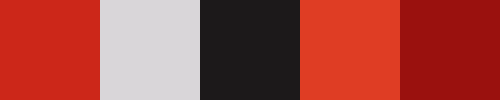

In [31]:
show_key_colors(colors)


(217, 214, 217)
(203, 39, 25)
(28, 25, 26)
(223, 61, 36)
(151, 16, 13)


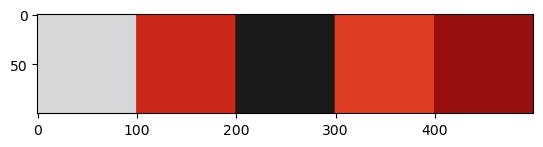

In [32]:
img = path_to_img_array(path)
plt.imshow(show_key_colors(pick_colors(img, 5)));

In [33]:
vec.size / img.size

1.0

In [34]:
path = 'crop/1.jpg'
img = path_to_img_array(path)

%time plt.imshow(show_key_colors(pick_colors(img, 8)));

FileNotFoundError: [Errno 2] No such file or directory: 'crop/1.jpg'